In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy.optimize import linprog

In [3]:
objective = [7, 4, 6, 1]

inequality_matrix = [[1, 2, -1, -1], [-1, -5, 2, 3]]

inequality_vector = [1, 1]

result = linprog(objective, A_eq=inequality_matrix, b_eq=inequality_vector)

In [4]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 15.0
              x: [ 2.000e+00  0.000e+00  0.000e+00  1.000e+00]
            nit: 3
          lower:  residual: [ 2.000e+00  0.000e+00  0.000e+00  1.000e+00]
                 marginals: [ 0.000e+00  2.000e+00  9.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [ 1.100e+01  4.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [5]:
n_list = [4, 10, 20, 30, 40, 50, 60, 70, 80]
m_list = [2, 6, 10, 14, 18, 22]

results =[]
run_num = 0

for n in n_list:
    for m in m_list:
        run_num += 1

        inequality_matrix = np.random.randint(-5, 6, size=(m, n))
        inequality_vector = np.random.randint(1, 11, size=m)
        objective = np.random.randint(1, 11, size=n)

        start = time.time()
        result = linprog(objective, A_eq=inequality_matrix, b_eq=inequality_vector)
        runtime = time.time() - start

        result_dict = {
            'n': n, 
            'm': m,
            'runtime': runtime,
            'iterations': result.nit if result.success else None,
            'optimal_value': result.fun if result.success else None,
            'success': result.success
        }
        results.append(result_dict)

df = pd.DataFrame(results)

In [6]:
successful = df[df['success'] == True].copy()

## Runtime by n

In [7]:
runtime_by_n = successful.groupby('n')['runtime'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_n)

      mean       std  min       max
n                                  
4   0.0000       NaN  0.0  0.000000
10  0.0000       NaN  0.0  0.000000
20  0.0000  0.000000  0.0  0.000000
30  0.0005  0.000577  0.0  0.001000
40  0.0004  0.000548  0.0  0.001001
50  0.0005  0.000548  0.0  0.001000
60  0.0005  0.000548  0.0  0.001000
70  0.0005  0.000548  0.0  0.001000
80  0.0005  0.000548  0.0  0.001001


[]

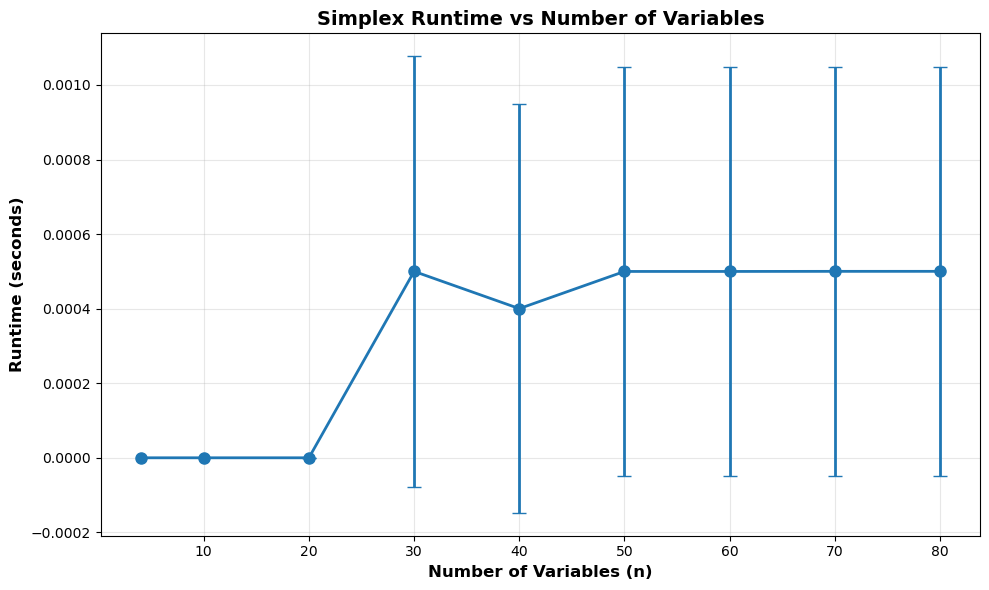

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
runtime_by_n = successful.groupby('n')['runtime'].agg(['mean', 'std'])
ax.errorbar(runtime_by_n.index, runtime_by_n['mean'], yerr=runtime_by_n['std'],
            marker='o', linewidth=2, markersize=8, capsize=5)
ax.set_xlabel('Number of Variables (n)', fontsize=12, fontweight='bold')
ax.set_ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Simplex Runtime vs Number of Variables', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()



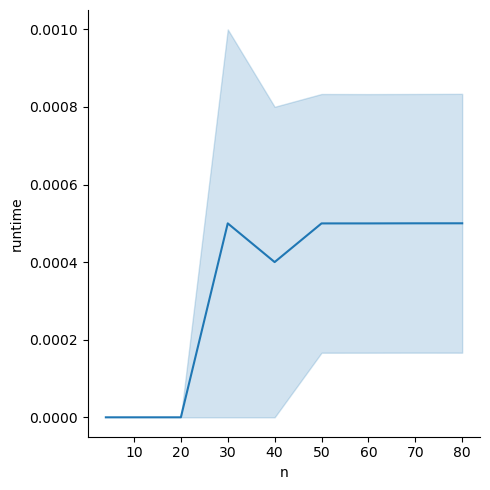

In [10]:
sns.relplot(data=successful, x='n', y='runtime', kind='line')

## Runtime by m

In [11]:
runtime_by_m = successful.groupby('m')['runtime'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_m)

        mean       std  min       max
m                                    
2   0.000556  0.000527  0.0  0.001001
6   0.000143  0.000378  0.0  0.001001
10  0.000571  0.000535  0.0  0.001000
14  0.000400  0.000548  0.0  0.001000
18  0.000800  0.000447  0.0  0.001001
22  0.000600  0.000548  0.0  0.001001


[]

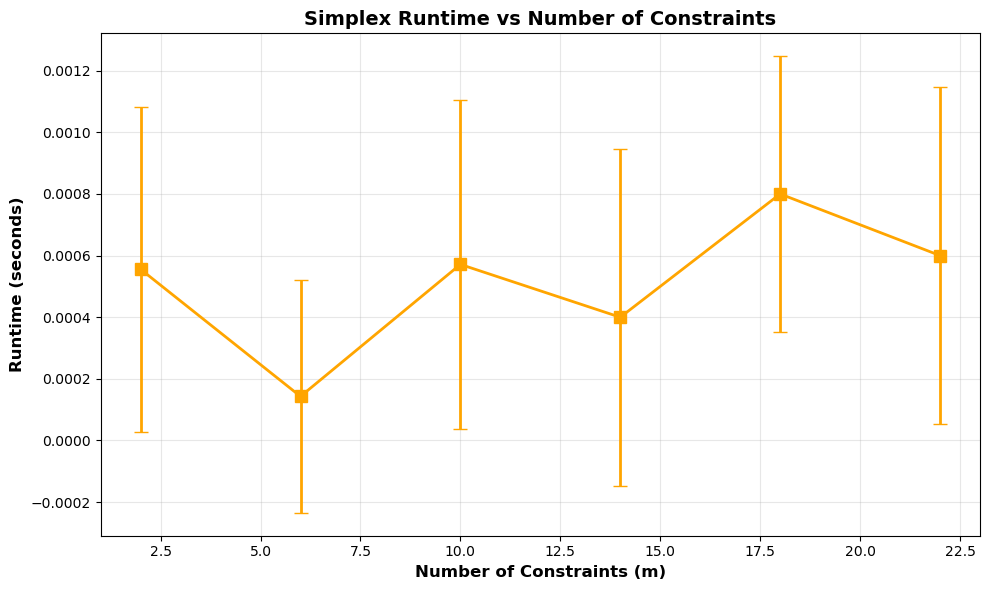

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
runtime_by_m = successful.groupby('m')['runtime'].agg(['mean', 'std'])
ax.errorbar(runtime_by_m.index, runtime_by_m['mean'], yerr=runtime_by_m['std'],
            marker='s', linewidth=2, markersize=8, capsize=5, color='orange')
ax.set_xlabel('Number of Constraints (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Simplex Runtime vs Number of Constraints', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()

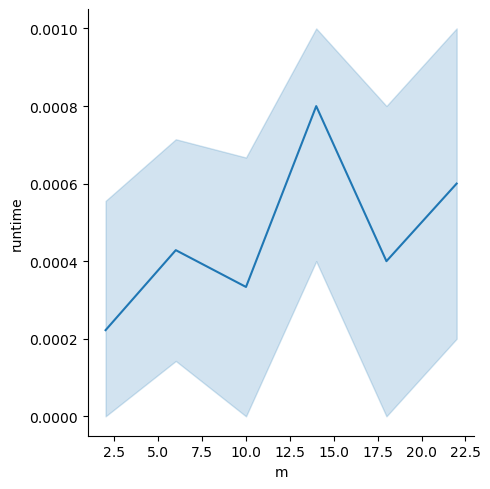

In [15]:
sns.relplot(data=successful, x='m', y='runtime', kind='line')

## Iterations by n

In [18]:
iterations_by_n = successful.groupby('n')['iterations'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_n)

         mean        std  min   max
n                                  
4    0.000000        NaN  0.0   0.0
10   2.000000        NaN  2.0   2.0
20   7.666667   5.686241  3.0  14.0
30   7.666667   5.507571  2.0  13.0
40  15.666667   9.852242  2.0  28.0
50  18.333333  12.691204  2.0  38.0
60  17.000000   9.715966  2.0  27.0
70  16.500000  11.326959  2.0  31.0
80  15.333333  10.171857  2.0  29.0


[]

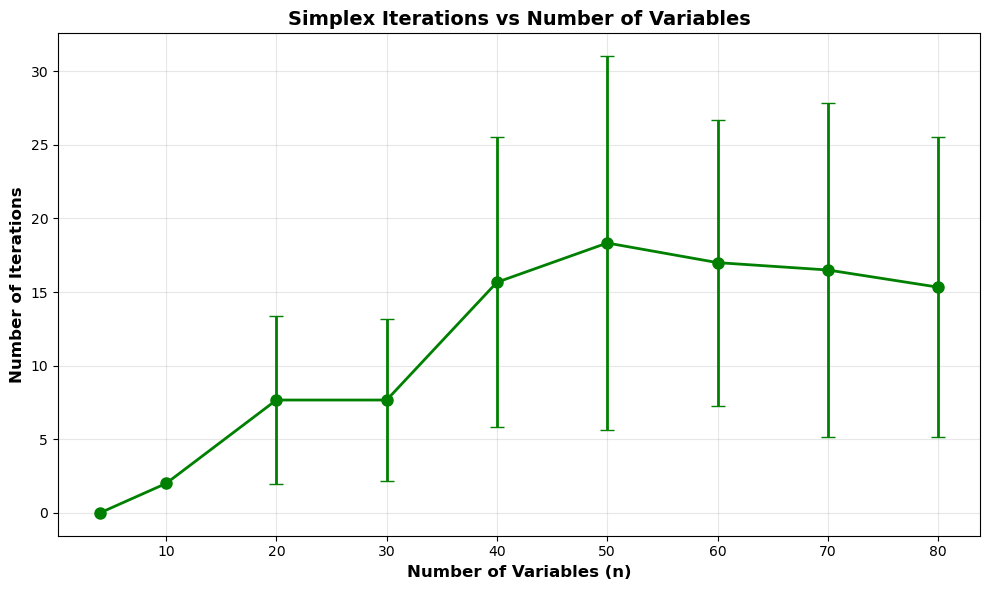

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
iter_by_n = successful.groupby('n')['iterations'].agg(['mean', 'std'])
ax.errorbar(iterations_by_n.index, iterations_by_n['mean'], yerr=iterations_by_n['std'],
            marker='o', linewidth=2, markersize=8, capsize=5, color='green')
ax.set_xlabel('Number of Variables (n)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Iterations', fontsize=12, fontweight='bold')
ax.set_title('Simplex Iterations vs Number of Variables', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()

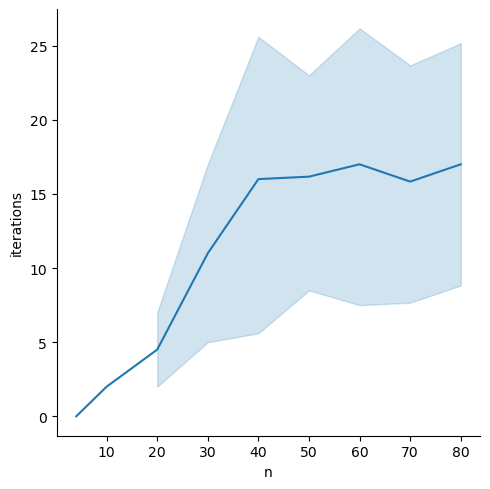

In [16]:
sns.relplot(data=successful, x='n', y='iterations', kind='line')

In [22]:
iterations_by_m = successful.groupby('m')['iterations'].agg(['mean', 'std', 'min', 'max'])
print(runtime_by_m)

        mean       std
m                     
2   0.000556  0.000527
6   0.000143  0.000378
10  0.000571  0.000535
14  0.000400  0.000548
18  0.000800  0.000447
22  0.000600  0.000548


[]

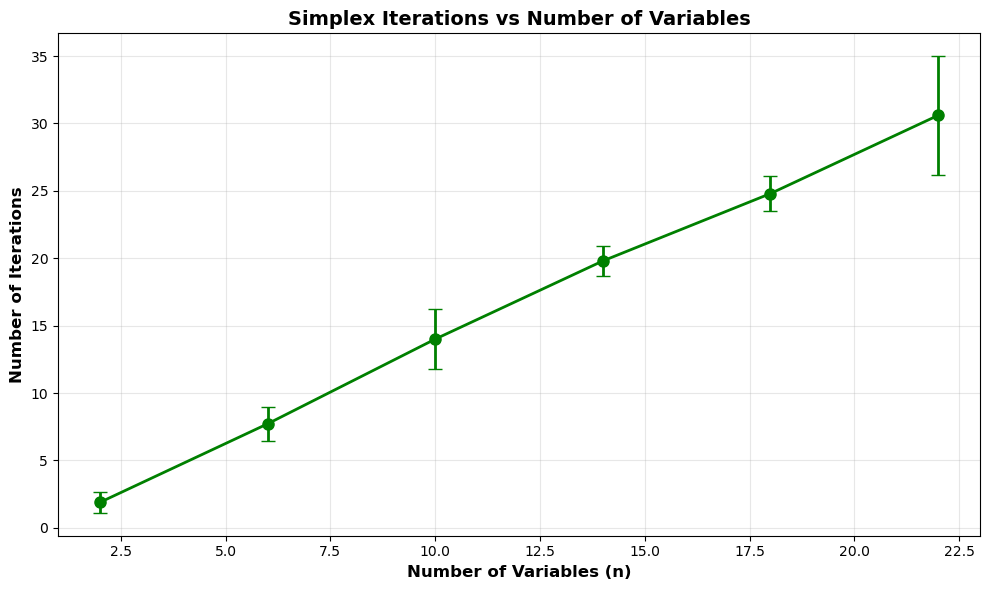

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
iter_by_n = successful.groupby('m')['iterations'].agg(['mean', 'std'])
ax.errorbar(iterations_by_m.index, iterations_by_m['mean'], yerr=iterations_by_m['std'],
            marker='o', linewidth=2, markersize=8, capsize=5, color='green')
ax.set_xlabel('Number of Variables (n)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Iterations', fontsize=12, fontweight='bold')
ax.set_title('Simplex Iterations vs Number of Variables', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot()

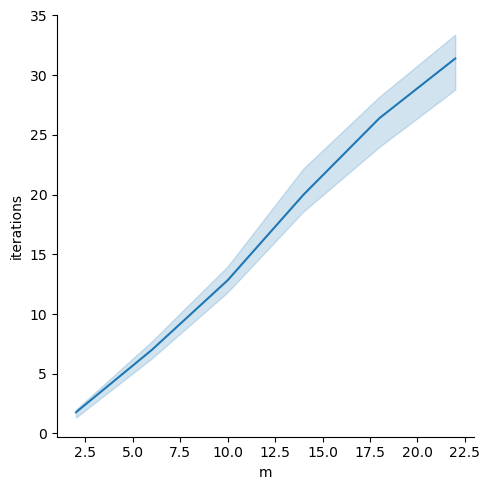

In [17]:
sns.relplot(data=successful, x='m', y='iterations', kind='line')